# CS 536: Final Project - Data Completion and Interpolation
#### Name:- Mahesh Reddy Annapureddy      
#### Netid:- ma1700.

## 1. Dataset and handling

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

The dataset is HCVdata.csv from UCI machine learning repository.The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.It contains toatlly 14 attributes and 615 instances. All attributes except for sex and category are numerical. In this project, data interpolation is purely concentrated on continuous values. so, categorical attributes i.e, 'index', 'Category','Age','sex' are dropped from the dataset. Now, dataset contains only continuous numerical values i.e, 'ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT'. Below is the code to drop categorical columns.

In [2]:
data = pd.read_csv("C:/Users/rvrma/Documents/2nd semester/Machine Learning/hcvdata.csv") 
data=data.drop(columns=['index','Category','Age','Sex'])
print(data)

      ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT
0    38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1  69.0
1    38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6  76.5
2    46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2  79.3
3    43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8  75.7
4    39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9  68.7
..    ...    ...    ...    ...   ...    ...   ...    ...    ...   ...
610  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9  68.5
611  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9  71.3
612  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2  82.0
613  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   50.0  71.0
614  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   34.0  68.0

[615 rows x 10 columns]


### Removing values randomly from dataset:-
As the chosen dataset doesnt have missing values, randomly values are deleted from the datset. To this, function named remove_featueres() is defined. This method deletes given percent of data for the given attributes of the dataset. Below is the code for remove_features() function.

In [16]:
def remove_features(data,remove_perc,cols):
    data1=data.copy()
    n_samples, n_features = data1.shape
    random_columns=random.sample(range(n_features),cols)
    for col in random_columns:
        no_samples_to_remove = random.sample(range(n_samples),int(remove_perc*n_samples/100))
        data1.iloc[:,col].where(data1.iloc[no_samples_to_remove,col] < 0 , inplace = True)
    return data1

In [17]:
true_data=data.copy()
new_data=remove_features(data,30,5)
print(data)
print(new_data)

      ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT
0    38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1  69.0
1    38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6  76.5
2    46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2  79.3
3    43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8  75.7
4    39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9  68.7
..    ...    ...    ...    ...   ...    ...   ...    ...    ...   ...
610  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9  68.5
611  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9  71.3
612  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2  82.0
613  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   50.0  71.0
614  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   34.0  68.0

[615 rows x 10 columns]
      ALB    ALP   ALT   AST   BIL    CHE  CHOL   CREA    GGT  PROT
0    38.5   52.5   7.7   NaN   7.5   6.93   NaN  106.0   12.1  69.0

To find the the which features are randomly removed find_missing_features() function is defined. And find_missing_columns() function return the attributes that have missing values and in the descending order of number of missing values. And this is all about the handling of the data

In [8]:
def find_missing_features(data):
    data=data.copy()
    n_samples,n_features = data.shape
    missing_column= data.isna()
    missing_column=missing_column.any()
    missing_columns=[]
    for i in range(n_features):
        if missing_column[i]:
            missing_columns.append(i)

    return missing_columns

def find_missing_columns(data):
    data_1=data.copy()
    missing_features = find_missing_features(data_1)
    n_samples,n_features = data_1.shape
    zero_features_num = new_data.isnull()
    zero_features_num = zero_features_num.sum(axis=0)
    missing_features_column= zero_features_num.nlargest(len(missing_features))
    missing_columns = []
    missing_columns = list(missing_features_column.index.values)
    missing_columns.reverse()
    print(missing_columns)
    return missing_columns

In [9]:
k=find_missing_features(new_data)
print(k)
k=find_missing_columns(new_data)

[0, 1, 2, 4, 6, 8, 9]
['ALB', 'ALP', 'GGT', 'BIL', 'PROT', 'ALT', 'CHOL']


## 2. Naive mean method:-
Here in this method, each missing features columns mean is calculated and replaced the missing values with the mean. For this mean_method() function is defined. It takes the data and returns the total filled data. Here mean_squared method is defined which calculates mean squared error of the predicted data and original data.

In [10]:
def mean_squared_error(data_1,data_2,perc):
    k=((data_1-data_2)**2).sum()
    n=(perc/100)*615
    k=k/n
    return k

def mean_method(data):
    
    data_1=data.copy()
    n_samples,n_features = data_1.shape
    missing_features=find_missing_features(data_1)
    
    for i in missing_features:
        mean = data_1.iloc[:, i].mean()
        mean = round(mean,2)
        data_1.iloc[:, i].fillna(mean, inplace=True)

    return data_1

       ALB     ALP    ALT     AST    BIL    CHE  CHOL   CREA    GGT   PROT
0    41.64   52.50   7.70   22.10   7.50   6.93  3.23  80.39  12.10  69.00
1    38.50   70.30  18.00   24.70  11.61  11.17  5.33  74.00  38.35  72.12
2    46.90   74.70  28.04   52.60   6.10   8.84  5.20  80.39  33.20  79.30
3    43.20   52.00  30.60   22.60  18.90   8.19  5.33  80.00  33.80  72.12
4    39.20   68.54  28.04   34.47  11.61   9.15  4.32  76.00  29.90  68.70
..     ...     ...    ...     ...    ...    ...   ...    ...    ...    ...
610  32.00  416.60   5.90  110.30  50.00   5.57  6.30  55.70  38.35  68.50
611  41.64  102.80   2.90   44.40  20.00   1.54  5.33  63.00  35.90  72.12
612  29.00   87.30   3.50   34.47  48.00   8.19  3.63  66.70  64.20  82.00
613  33.00   68.54  39.00   62.00  20.00   3.56  4.20  52.00  38.35  71.00
614  36.00   68.54  28.04   80.00  11.61   9.07  5.33  67.00  38.35  68.00

[615 rows x 10 columns]
      ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT
0    

Text(0.5, 1.0, 'Mean squared error  as a function of percent of data removed over all the data')

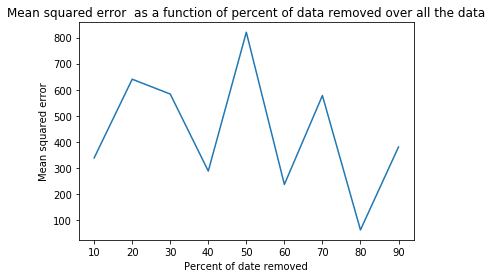

In [18]:
data=true_data.copy()
new_data=remove_features(data,30,10)
mean_data=mean_method(new_data)
print(mean_data)
perc=10
mse_all=[]
percent=[]
print(true_data)
for i in range(9):
    percent.append(perc)
    data=true_data.copy()
    new_data=remove_features(data,perc,5)
    mean_data=mean_method(new_data)
    k=mean_squared_error(true_data,mean_data,perc)
    k=list(k)
    perc=perc+10
    print("percent of the data is missing:",perc-10)
    #print(k)
    mse_all.append(sum(k)/10)
print(percent)
print(mse_all)
plt.plot(percent,mse_all)
plt.xlabel('Percent of date removed')
plt.ylabel('Mean squared error')
plt.title('Mean squared error  as a function of percent of data removed over all the data')

We can see that from as the percent of the data removed changes the mean squared erroa changes irregularly as it is random. Here the metric used to evaluate the model is mean squared error.

## 3. Regression Model:-
Now same data interpolation is performing with the regression models i.e, Naive regression,ridge and lasso models.
Here, we use the predefined functions i.e, find_missing_features() to remove the datapoints randomly from the dataset. Other functions to find the columns that has missing values.
so, the method that followed is first we find the which columns have missing values. Now we will find among the missing value features, the least missing feature is considered as y value and remaining features are considered as x-values. we train these data values using the regression models and we predict the missing values.

### Linear Regression:-

In [14]:
def linear_regression(x,y):
    w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    w = np.reshape(w,(len(w),-1))
    return w

def predict(data, weights):
    predicted=np.dot(data, weights)
    return predicted

def linear_regression_fit(data):
    data_1=data.copy()
    # finding missing columns name in descending order
    missing_columns=find_missing_columns(data)
    #maintaining a copy of missing columns
    missing_columns_c=missing_columns.copy()
    
    for i in missing_columns:
        #removing a filled column after each iteration
        missing_columns_c.remove(i)
        all_data = data_1[data_1.columns.drop(missing_columns_c)]
        test_data = all_data[all_data.isna().any(axis=1)]
        #finding indices of missing samples data
        missing_samples_index = test_data.index
        #splitting data into train data and test data
        train_data = all_data.dropna(how='any', axis=0)
        test_data = test_data.dropna(axis=1)
        #splitting train data into x and y data
        x_data=train_data.drop(i, axis=1)
        y_data=train_data[i]
        #finding the linear regression
        weights = linear_regression(x_data,y_data)
        #predicting weights with trained weights
        predict_data = predict(test_data, weights)
        test_data[i] = predict_data
        #Interpolating the dataset with predicted values
        for j, sample in enumerate(missing_samples_index):
            data_1.loc[sample, i] = test_data.loc[sample, i]
    
    return data_1

['ALT', 'ALP', 'PROT', 'GGT', 'CHE', 'ALB', 'CHOL']
           ALB         ALP    ALT    AST   BIL    CHE      CHOL   CREA  \
0    38.500000   52.500000    7.7   22.1   7.5   6.93  3.230000  106.0   
1    38.500000   70.300000   18.0   24.7   3.9  11.17  6.056381   74.0   
2    46.900000   74.700000   36.2   52.6   6.1   8.84  5.200000   86.0   
3    43.200000   52.000000   30.6   22.6  18.9   7.33  4.740000   80.0   
4    39.715680   74.100000   32.6   24.8   9.6   9.15  4.320000   76.0   
..         ...         ...    ...    ...   ...    ...       ...    ...   
610  17.017459  416.600000    5.9  110.3  50.0   5.57  6.180446   55.7   
611  24.000000  102.800000    2.9   44.4  20.0   1.54  3.316803   63.0   
612  29.000000   87.300000    3.5   99.0  48.0   1.66  3.630000   66.7   
613  29.053833   67.344346   39.0   62.0  20.0   3.56  3.693227   52.0   
614  36.000000  121.216760  100.0   80.0  12.0   9.07  5.300000   67.0   

            GGT       PROT  
0     12.100000  50.725068  
1

Text(0.5, 1.0, 'Mean squared error  as a function of percent of data removed over all the data')

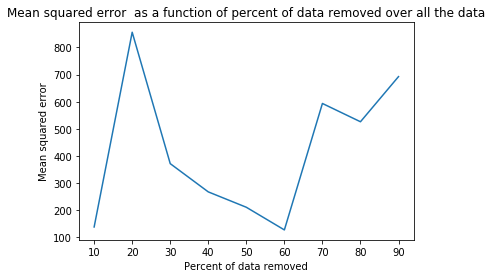

In [19]:
data=true_data.copy()
new_data=remove_features(data,30,5)
linear_data=linear_regression_fit(new_data)
print(linear_data)
perc=10
mse_all=[]
percent=[]
print(true_data)
for i in range(9):
    percent.append(perc)
    data=true_data.copy()
    new_data=remove_features(data,perc,5)
    mean_data=linear_regression_fit(new_data)
    k=mean_squared_error(true_data,mean_data,perc)
    k=list(k)
    perc=perc+10
    print("percent of the data is missing:",perc-10)
    #print(k)
    mse_all.append(sum(k)/10)
print(percent)
print(mse_all)
plt.plot(percent,mse_all)
plt.xlabel('Percent of data removed')
plt.ylabel('Mean squared error')
plt.title('Mean squared error  as a function of percent of data removed over all the data')

We can see that from as the percent of the data removed changes the mean squared erroa changes irregularly as it is random. Here the metric used to evaluate the model is mean squared error.

### Ridge regression:-

In [34]:
def ridge_regression(x,y,lamda):
    features=x.shape[1]
    w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x) + lamda*np.identity(features)), x.T), y)
    w = np.reshape(w,(len(w),-1))
    return w

def ridge_regression_fit(data):
    data_1=data.copy()
    # finding missing columns name in descending order
    missing_columns=find_missing_columns(data)
    #maintaining a copy of missing columns
    missing_columns_c=missing_columns.copy()
    
    for i in missing_columns:
        #removing a filled column after each iteration
        missing_columns_c.remove(i)
        all_data = data_1[data_1.columns.drop(missing_columns_c)]
        test_data = all_data[all_data.isna().any(axis=1)]
        #finding indices of missing samples data
        missing_samples_index = test_data.index
        #splitting data into train data and test data
        train_data = all_data.dropna(how='any', axis=0)
        test_data = test_data.dropna(axis=1)
        #splitting train data into x and y data
        x_data=train_data.drop(i, axis=1)
        y_data=train_data[i]
        #finding the ridge regression
        weights = ridge_regression(x_data,y_data,0.1)
        #predicting weights with trained weights
        predict_data = predict(test_data, weights)
        test_data[i] = predict_data
        #Interpolating the dataset with predicted values
        for j, sample in enumerate(missing_samples_index):
            data_1.loc[sample, i] = test_data.loc[sample, i]
    
    return data_1

['ALB', 'ALP', 'CREA', 'BIL', 'PROT', 'ALT', 'CHOL']
      ALB         ALP         ALT    AST        BIL    CHE      CHOL  \
0    38.5   52.500000    7.700000   22.1   7.500000   6.93  3.230000   
1    38.5   70.300000   29.365558   24.7   3.900000  11.17  4.800000   
2    46.9   74.700000   33.163723   52.6   6.100000   8.84  5.867658   
3    43.2   52.000000   22.046200   22.6  18.900000   7.33  5.056589   
4    39.2   74.100000   32.600000   24.8   9.600000   9.15  4.320000   
..    ...         ...         ...    ...        ...    ...       ...   
610  32.0  416.600000  112.506496  110.3  69.584499   5.57  6.300000   
611  24.0  102.800000    2.900000   44.4  20.000000   1.54  3.020000   
612  29.0   87.300000    3.500000   99.0  29.992125   1.66  3.630000   
613  33.0   49.942454   39.000000   62.0  18.755176   3.56  4.200000   
614  36.0   58.713158  100.000000   80.0  13.263519   9.07  5.300000   

           CREA    GGT       PROT  
0    106.000000   12.1  69.000000  
1     73.4

Text(0.5, 1.0, 'Mean squared error  as a function of percent of data removed over all the data')

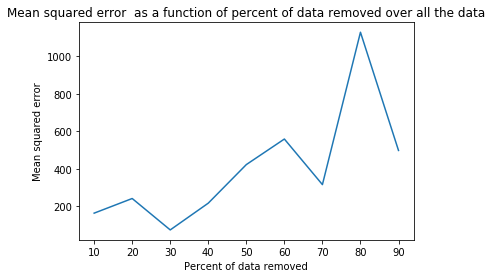

In [35]:
data=true_data.copy()
new_data=remove_features(data,30,5)
linear_data=ridge_regression_fit(new_data)
print(linear_data)
perc=10
mse_all=[]
percent=[]
print(true_data)
for i in range(9):
    percent.append(perc)
    data=true_data.copy()
    new_data=remove_features(data,perc,5)
    mean_data=ridge_regression_fit(new_data)
    k=mean_squared_error(true_data,mean_data,perc)
    k=list(k)
    perc=perc+10
    print("percent of the data is missing:",perc-10)
    #print(k)
    mse_all.append(sum(k)/10)
print(percent)
print(mse_all)
plt.plot(percent,mse_all)
plt.xlabel('Percent of data removed')
plt.ylabel('Mean squared error')
plt.title('Mean squared error  as a function of percent of data removed over all the data')

From the above plot, we can say that as the the percent of data removed is increased mean squared error is increasing. And from the plot we can say that ridge regression performed on par with linear model.After experimenting with lambda values, lambda=0.1 is the optimal value for the model.

In [32]:
def lasso_regression(x,y, lamda, iterations):
    x = np.array(x)
    y = np.array(y).reshape((len(y), 1))
    n, features = x.shape
    w = np.zeros(shape=(features,1))
    #print(w)
    w[0] = np.sum(y - np.dot(x[:, 1:], w[1:]))/n        
    for i in range(iterations):
        for j in range(1, features):
            w_1 = w.copy()
            r = y - np.dot(x, w_1)
            A = np.dot(x[:, j], r)
            B = lamda/2
            first=(-A+B)/np.dot(x[:,j].T,x[:,j])
            second=(-A-B)/np.dot(x[:,j].T,x[:,j])
            if w[j]>first:
                w[j]=w[j]-first
            elif w[j]<second:
                w[j]=w[j]-second
            else:
                w[j]=0
    w = np.reshape(w,(len(w),-1))
    return w

def lasso_regression_fit(data):
    data_1=data.copy()
    # finding missing columns name in descending order
    missing_columns=find_missing_columns(data)
    #maintaining a copy of missing columns
    missing_columns_c=missing_columns.copy()
    
    for i in missing_columns:
        #removing a filled column after each iteration
        missing_columns_c.remove(i)
        all_data = data_1[data_1.columns.drop(missing_columns_c)]
        test_data = all_data[all_data.isna().any(axis=1)]
        #finding indices of missing samples data
        missing_samples_index = test_data.index
        #splitting data into train data and test data
        train_data = all_data.dropna(how='any', axis=0)
        test_data = test_data.dropna(axis=1)
        #splitting train data into x and y data
        x_data=train_data.drop(i, axis=1)
        y_data=train_data[i]
        #finding the lasso regression
        weights = lasso_regression(x_data,y_data,1,1000)
        #predicting weights with trained weights
        predict_data = predict(test_data, weights)
        test_data[i] = predict_data
        #Interpolating the dataset with predicted values
        for j, sample in enumerate(missing_samples_index):
            data_1.loc[sample, i] = test_data.loc[sample, i]
    
    return data_1

['PROT', 'CHOL', 'ALP', 'CREA', 'BIL', 'AST', 'ALB', 'ALT']
            ALB         ALP    ALT          AST        BIL    CHE  CHOL  \
0    197.536647   52.500000    7.7    22.100000   7.500000   6.93  3.23   
1    -26.029591   70.300000   18.0    24.700000   3.900000  11.17  4.80   
2     46.900000   74.700000   36.2    52.600000  50.129870   8.84  5.20   
3     43.200000   52.000000   30.6  -419.581441  18.900000   7.33  4.74   
4     39.200000   74.100000   32.6    24.800000   9.600000   9.15  4.32   
..          ...         ...    ...          ...        ...    ...   ...   
610   32.000000  416.600000    5.9   110.300000  70.370783   5.57  6.30   
611  405.266844  102.800000    2.9    44.400000  12.915724   1.54  3.02   
612   29.000000   87.300000    3.5  1345.476669  48.000000   1.66  3.63   
613   33.000000 -204.013317   39.0    62.000000  20.000000   3.56  4.20   
614   36.000000  147.077586  100.0  2821.035828  12.000000   9.07  5.30   

             CREA    GGT  PROT  
0     

Text(0.5, 1.0, 'Mean squared error  as a function of percent of data removed over all the data')

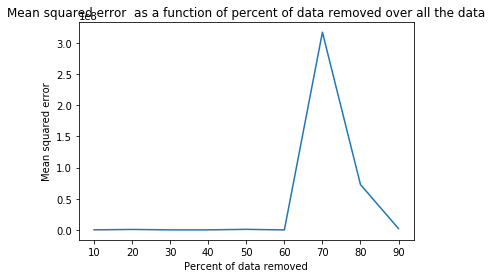

In [33]:
data=true_data.copy()
new_data=remove_features(data,30,5)
linear_data=lasso_regression_fit(new_data)
print(linear_data)
perc=10
mse_all=[]
percent=[]
print(true_data)
for i in range(9):
    percent.append(perc)
    data=true_data.copy()
    new_data=remove_features(data,perc,5)
    mean_data=lasso_regression_fit(new_data)
    k=mean_squared_error(true_data,mean_data,perc)
    k=list(k)
    perc=perc+10
    print("percent of the data is missing:",perc-10)
    #print(k)
    mse_all.append(sum(k)/10)
print(percent)
print(mse_all)
plt.plot(percent,mse_all)
plt.xlabel('Percent of data removed')
plt.ylabel('Mean squared error')
plt.title('Mean squared error  as a function of percent of data removed over all the data')

From the above plot and previous plots, we can say that mean squred error for lasso regression for the dataset is way higher than other models. And as the percent of data removed increases, MSE also increases.

After observing the plots, we can say that ridge regression and naive mean methods are working and interpolating the data almost the same where as lasso performance is worse on the data.